In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traindf = pd.read_csv('/content/drive/MyDrive/1/28.10 Графический интерфейс/Housing/train_housing_prepr.csv').drop(["Unnamed: 0",'listing_type', 'sub_type'], axis = 1)
testdf = pd.read_csv('/content/drive/MyDrive/1/28.10 Графический интерфейс/Housing/test_housing_prepr.csv').drop(["Unnamed: 0",'listing_type', 'sub_type'], axis = 1)

In [ ]:
traindf

,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price
0,30,4,9,13,6,150.0,8,324000.0
1,58,1,3,11,4,95.0,8,180000.0
2,47,4,3,13,6,140.0,11,4200.0
3,31,8,3,32,4,97.0,8,290000.0
4,3,5,10,17,6,122.0,8,290000.0
...,...,...,...,...,...,...,...,...
89995,123,5,6,16,4,100.0,7,160000.0
89996,30,2,5,14,4,95.0,8,235000.0
89997,31,1,15,18,4,85.0,8,183000.0
89998,91,0,4,15,6,133.0,8,210000.0


In [ ]:
testdf

,tom,building_age,total_floor_count,floor_no,room_count,size,heating_type,price
0,30,0,15,16,8,175.0,11,409500.0
1,124,0,4,11,4,100.0,14,250000.0
2,80,0,8,13,4,75.0,8,210000.0
3,134,2,4,33,6,120.0,11,290000.0
4,32,5,10,17,6,122.0,8,290000.0
...,...,...,...,...,...,...,...,...
42712,73,1,4,32,4,95.0,12,200000.0
42713,30,8,4,13,8,130.0,7,218000.0
42714,63,23,10,0,4,127.0,8,245000.0
42715,118,2,4,32,4,75.0,7,445000.0


In [ ]:
y_train = traindf["building_age"]
x_train = traindf.drop("building_age", axis = 1)
y_test = testdf["building_age"]
x_test = testdf.drop("building_age", axis = 1)

In [ ]:
x_train

,tom,total_floor_count,floor_no,room_count,size,heating_type,price
0,30,9,13,6,150.0,8,324000.0
1,58,3,11,4,95.0,8,180000.0
2,47,3,13,6,140.0,11,4200.0
3,31,3,32,4,97.0,8,290000.0
4,3,10,17,6,122.0,8,290000.0
...,...,...,...,...,...,...,...
89995,123,6,16,4,100.0,7,160000.0
89996,30,5,14,4,95.0,8,235000.0
89997,31,15,18,4,85.0,8,183000.0
89998,91,4,15,6,133.0,8,210000.0


In [ ]:
y_train.value_counts()

0     38442
8     10461
2      7472
18     6723
13     6381
1      4157
23     3935
4      3561
3      2948
5      2718
28     2112
33      734
38      208
40      148
Name: building_age, dtype: int64

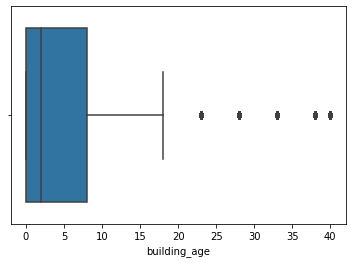

In [ ]:
sns.boxplot(y_train)

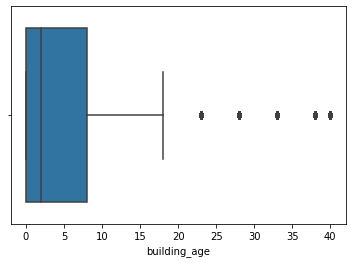

In [ ]:
sns.boxplot(y_test)

# Регрессия (предсказание возраста дома)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scal = StandardScaler() # создаем объект класса 

In [ ]:
x_train = scal.fit_transform(x_train)
x_test = scal.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2-score:', r2)

MAE: 6.393059004113836
R2-score: 0.03350931514125943


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
model = RandomForestRegressor(random_state=17, max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2-score:', r2)

MAE: 6.236418861284146
R2-score: 0.06746126926716622


In [ ]:
model.feature_importances_ 

array([0.20816554, 0.11001016, 0.11500118, 0.0311043 , 0.15562952,
       0.09486217, 0.28522714])

In [42]:
params = {'n_estimators': [100],
          'max_depth': [3, 5, 10, 30],
          'min_samples_split': [2, 4, 6],
          'min_samples_leaf': [1, 2, 5],
          }

In [43]:
model = RandomForestRegressor(random_state=17)
grid_cv = GridSearchCV(estimator=model,
                       param_grid=params,
                       cv=3, 
                       scoring = 'neg_mean_absolute_error',
                       verbose = 1, 
                       )

In [ ]:
help(GridSearchCV)

In [44]:
grid_cv.fit(x_train, y_train)
grid_cv.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 14.7min finished


{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [45]:
best_rf = grid_cv.best_estimator_ # лучший алгоритм

In [46]:
y_pred = best_rf.predict(x_test)

In [47]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2-score:', r2)

MAE: 4.830247571333414
R2-score: 0.30783972258045855


In [48]:
grid_cv.best_score_

-5.052076415815706

In [50]:
joblib.dump(best_rf, "/content/drive/MyDrive/1/28.10 Графический интерфейс/Housing/best_housing_rf.pkl")

['/content/drive/MyDrive/1/28.10 Графический интерфейс/Housing/best_housing_rf.pkl']

In [ ]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

# **Catboost**

In [51]:
!pip install catboost

In [52]:
from catboost import CatBoostRegressor
from sklearn import model_selection


In [ ]:
#c_b = CatBoostRegressor(loss_function='RMSE', task_type="CPU", eval_metric='MAE',
                         #learning_rate=0.02)

In [ ]:
c_b = CatBoostRegressor(iterations=10000)

In [ ]:
c_b.fit(x_train, y_train)

In [ ]:
y_pred = c_b.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2-score:', r2)

MAE: 5.3732112652533734
R2-score: 0.2316353586332176


# **Поиск по сетке**

In [56]:
c_b = CatBoostRegressor(loss_function='RMSE', task_type="GPU", eval_metric='MAE')

In [59]:
params_ = {'learning_rate': [0.01,0.03,0.04],
        'depth': [4,6,8,10],
        'l2_leaf_reg': [3],
        'iterations': [2000]
        }

In [54]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid = GridSearchCV(c_b, params_, cv = 3, verbose=1)

In [61]:
%%timeit
grid.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Выходные данные были обрезаны до нескольких последних строк (5000).
1000:	learn: 4.7656724	total: 12.8s	remaining: 12.8s
1001:	learn: 4.7648349	total: 12.8s	remaining: 12.8s
1002:	learn: 4.7643958	total: 12.9s	remaining: 12.8s
1003:	learn: 4.7637156	total: 12.9s	remaining: 12.8s
1004:	learn: 4.7630474	total: 12.9s	remaining: 12.8s
1005:	learn: 4.7627339	total: 12.9s	remaining: 12.7s
1006:	learn: 4.7619896	total: 12.9s	remaining: 12.7s
1007:	learn: 4.7612000	total: 12.9s	remaining: 12.7s
1008:	learn: 4.7605922	total: 12.9s	remaining: 12.7s
1009:	learn: 4.7601974	total: 12.9s	remaining: 12.7s
1010:	learn: 4.7593370	total: 13s	remaining: 12.7s
1011:	learn: 4.7589125	total: 13s	remaining: 12.7s
1012:	learn: 4.7583740	total: 13s	remaining: 12.7s
1013:	learn: 4.7578005	total: 13s	remaining: 12.6s
1014:	learn: 4.7570740	total: 13s	remaining: 12.6s
1015:	learn: 4.7565870	total: 13s	remaining: 12.6s
1016:	learn: 4.7559531	total: 13s	remaining: 12.6s
1017:	learn: 4.7552750	total: 13.1s	remaining

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 12.2min finished


0:	learn: 6.5057736	total: 13.6ms	remaining: 27.3s
1:	learn: 6.4754701	total: 26.8ms	remaining: 26.8s
2:	learn: 6.4481431	total: 38.8ms	remaining: 25.9s
3:	learn: 6.4194604	total: 51.1ms	remaining: 25.5s
4:	learn: 6.3930083	total: 62.9ms	remaining: 25.1s
5:	learn: 6.3680576	total: 74.7ms	remaining: 24.8s
6:	learn: 6.3430208	total: 86.4ms	remaining: 24.6s
7:	learn: 6.3201014	total: 98.2ms	remaining: 24.5s
8:	learn: 6.2984757	total: 110ms	remaining: 24.4s
9:	learn: 6.2753306	total: 123ms	remaining: 24.4s
10:	learn: 6.2559882	total: 135ms	remaining: 24.4s
11:	learn: 6.2346833	total: 147ms	remaining: 24.3s
12:	learn: 6.2166361	total: 159ms	remaining: 24.2s
13:	learn: 6.1986778	total: 171ms	remaining: 24.2s
14:	learn: 6.1801472	total: 183ms	remaining: 24.2s
15:	learn: 6.1627069	total: 195ms	remaining: 24.2s
16:	learn: 6.1473208	total: 231ms	remaining: 26.9s
17:	learn: 6.1320764	total: 243ms	remaining: 26.7s
18:	learn: 6.1169944	total: 255ms	remaining: 26.6s
19:	learn: 6.1017764	total: 270ms

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Выходные данные были обрезаны до нескольких последних строк (5000).
258:	learn: 5.8860089	total: 1.5s	remaining: 10.1s
259:	learn: 5.8851380	total: 1.5s	remaining: 10.1s
260:	learn: 5.8842833	total: 1.51s	remaining: 10.1s
261:	learn: 5.8832151	total: 1.51s	remaining: 10.1s
262:	learn: 5.8827401	total: 1.52s	remaining: 10s
263:	learn: 5.8824203	total: 1.53s	remaining: 10s
264:	learn: 5.8817833	total: 1.53s	remaining: 10s
265:	learn: 5.8811865	total: 1.54s	remaining: 10s
266:	learn: 5.8806891	total: 1.54s	remaining: 10s
267:	learn: 5.8798531	total: 1.55s	remaining: 10s
268:	learn: 5.8791432	total: 1.55s	remaining: 10s
269:	learn: 5.8784922	total: 1.56s	remaining: 10s
270:	learn: 5.8772729	total: 1.56s	remaining: 9.99s
271:	learn: 5.8765958	total: 1.58s	remaining: 10s
272:	learn: 5.8758604	total: 1.58s	remaining: 10s
273:	learn: 5.8755151	total: 1.59s	remaining: 10s
274:	learn: 5.8747422	total: 1.59s	remaining: 9.98s
275:	learn: 5.8735484	total: 1.6s	remaining: 9.98s
276:	learn: 5.8729156

RecursionError: ignored

In [ ]:
help(GridSearchCV)

In [62]:
grid.best_params_

{'depth': 10, 'iterations': 2000, 'l2_leaf_reg': 3, 'learning_rate': 0.04}

In [63]:
best_cb = grid.best_estimator_

In [65]:
y_pred = best_cb.predict(x_test)

In [66]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE:', mae)
print('R2-score:', r2)

MAE: 5.177996374184246
R2-score: 0.2653042723700505


In [67]:
grid.best_score_

0.2426449679702901

In [49]:
import joblib

In [68]:
joblib.dump(best_cb, "/content/drive/MyDrive/1/28.10 Графический интерфейс/Housing/best_housing_cb.pkl") # сохранение

['/content/drive/MyDrive/1/28.10 Графический интерфейс/Housing/best_housing_cb.pkl']